In [1]:
class RandomShuffle(object):
    def __call__(self, img):
        left = img[:,:,0:14].flatten()
        right = img[:,:,14:28].flatten()
        left = left[torch.randperm(len(left))].reshape(1,28,14)
        right = right[torch.randperm(len(right))].reshape(1,28,14)
        img[:,:,0:14] = left
        img[:,:,14:28] = right
        return img

    

In [2]:
import torch
import torchvision

batch_size=128
norm_tsfm = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()
                             ])
shuffle_tsfm = torchvision.transforms.Compose([
                torchvision.transforms.ToTensor(),
                               RandomShuffle()
                             ])

train_set = torchvision.datasets.MNIST('.', train=True, download=True,
                             transform=norm_tsfm)
shuffle_train_set = torchvision.datasets.MNIST('.', train=True, download=True,
                             transform=shuffle_tsfm)


test_set = torchvision.datasets.MNIST('.', train=False, download=True,
                             transform=norm_tsfm)

shuffle_test_set = torchvision.datasets.MNIST('.', train=False, download=True,
                             transform=shuffle_tsfm)

#train_loader = torch.utils.data.DataLoader(train_set,
#  batch_size=batch_size, shuffle=True)
#test_loader = torch.utils.data.DataLoader(test_set,
#  batch_size=batch_size, shuffle=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

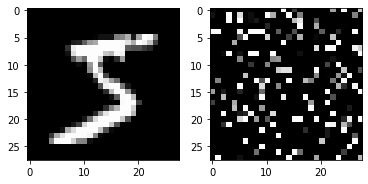

In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.imshow(train_set[0][0][0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(shuffle_train_set[0][0][0], cmap='gray')

In [42]:
import torch.nn as nn
import torch.nn.functional as F


class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


In [54]:
import tqdm.notebook as tq 
model = Classifier()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 100
train_acc = torch.zeros(epochs)
test_acc = torch.zeros(epochs)
for epoch in range(epochs):
    total = 0
    correct = 0
    for i, (imgs, labels) in enumerate(tq.tqdm(train_loader)):
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        imgs = imgs.reshape(-1,28*28)
        imgs[:,0:28*14],_ = torch.sort(imgs[:,0:28*14],dim=1)
        imgs[:,28*14:28*28],_ = torch.sort(imgs[:,28*14:28*28],dim=1)
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    train_acc[epoch] = 100 * correct / total
    print('Train acc: ', train_acc[epoch])
    
    
    if epoch % 5 == 0:
        total = 0
        correct = 0
        for i, (imgs, labels) in enumerate(tq.tqdm(test_loader)):
            imgs = imgs.to(device)
            labels = labels.to(device)
            imgs = imgs.reshape(-1,28*28)
            imgs[:,0:28*14],_ = torch.sort(imgs[:,0:28*14], dim=1)
            imgs[:,28*14:28*28],_ = torch.sort(imgs[:,28*14:28*28],dim=1)
            outputs = model(imgs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum()
        test_acc[epoch] = 100 * correct / total
        print('Test acc: ', test_acc[epoch])

    
    

  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(23.1617)


  0%|          | 0/79 [00:00<?, ?it/s]

Test acc:  tensor(24.4000)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(24.4833)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(24.3467)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(25.1600)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(25.1767)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(24.8667)


  0%|          | 0/79 [00:00<?, ?it/s]

Test acc:  tensor(25.4400)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(25.1917)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(25.0417)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(25.1350)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(25.1067)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(25.3567)


  0%|          | 0/79 [00:00<?, ?it/s]

Test acc:  tensor(24.6900)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(25.2567)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(25.1883)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(25.1850)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(25.0867)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(25.2583)


  0%|          | 0/79 [00:00<?, ?it/s]

Test acc:  tensor(25.1700)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(25.0050)


  0%|          | 0/469 [00:00<?, ?it/s]

Train acc:  tensor(25.1700)


  0%|          | 0/469 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [53]:
def gen_prob_map(target_lbl, hist=None, weights=False):
    tidxs = (train_set.targets==target_lbl)
    sub_data = train_set.data[tidxs]
    prob_map = torch.zeros(28,28,256)
        
    if weights:
        hists = torch.zeros(sub_data.shape[0], 256)
        for i,s in enumerate(sub_data):
            hists[i] = torch.bincount(s.flatten(), minlength=256)
        norms = torch.linalg.norm(hists - hist, dim=1)
        norms = torch.max(norms) - norms + 1
        for i in range(sub_data.shape[1]):
            for j in range(sub_data.shape[2]):  
                prob_map[i,j] = torch.bincount(sub_data[:,i,j], weights=norms, minlength=256)#/sub_data.shape[0]

    else:
        for i in range(sub_data.shape[1]):
            for j in range(sub_data.shape[2]):    
                prob_map[i,j] = torch.bincount(sub_data[:,i,j], minlength=256)#/sub_data.shape[0]

    return prob_map

def gen_prob_map_exemp(target, hist, k, weights=False):
    tidxs = (train_set.targets==target_lbl)
    sub_data = train_set.data[tidxs]
    hists = torch.zeros(sub_data.shape[0], 256)
    for i,s in enumerate(sub_data):
        hists[i] = torch.bincount(s.flatten(), minlength=256)
    norms = torch.linalg.norm(hists - hist, dim=1)
    knn = norms.topk(k, largest=False)
    sub_knn = sub_data[knn.indices]
    prob_map = torch.zeros(28,28,256)
    if weights:
        norms = torch.max(knn.values) - knn.values + 1
        for i in range(sub_knn.shape[1]):
            for j in range(sub_knn.shape[2]):
                prob_map[i,j] = torch.bincount(sub_knn[:,i,j],weights=norms,minlength=256)#/sub_knn.shape[0]
    else:
        for i in range(sub_knn.shape[1]):
            for j in range(sub_knn.shape[2]):
                prob_map[i,j] = torch.bincount(sub_knn[:,i,j], minlength=256)#/sub_knn.shape[0]

    return prob_map



torch.Size([28, 28])


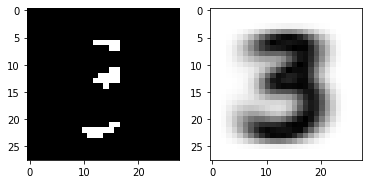

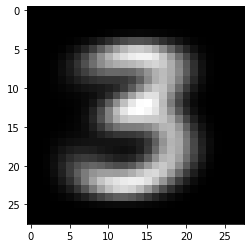

In [13]:
prob_map = gen_prob_map(3)
max_val, max_map = torch.max(prob_map,dim=2)

exp_map = torch.sum(prob_map * torch.arange(256), dim=2)
print(max_map.shape)
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(max_map, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(max_val, cmap='gray')
plt.figure()
plt.imshow(exp_map, cmap='gray')

tensor(11.8693)


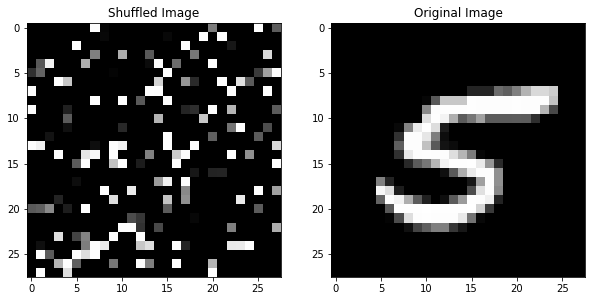

In [47]:
import random
target_lbl=5
prob_map = gen_prob_map(target_lbl)
stidxs = torch.nonzero((shuffle_train_set.targets==target_lbl))
i = random.randint(0, stidxs.shape[0]-1)
stidx = int(stidxs[i])
#sub_shuf_data = shuffle_train_set[stidxs]
sub_shuf_target = shuffle_train_set.targets[stidxs]
orig_img, orig_lbl = train_set[stidx]
test_img, test_lbl = shuffle_train_set[stidx]
fig = plt.figure(figsize=(10,20))
fig.add_subplot(1,2,1)
plt.imshow(test_img.squeeze(), cmap='gray')
plt.title('Shuffled Image')
fig.add_subplot(1,2,2)
plt.imshow(orig_img.squeeze(), cmap='gray')
plt.title('Original Image')
print(torch.linalg.norm(test_img.squeeze() - orig_img.squeeze(), dim=(0,1)))
test_img = (255*test_img).type(torch.uint8).squeeze()

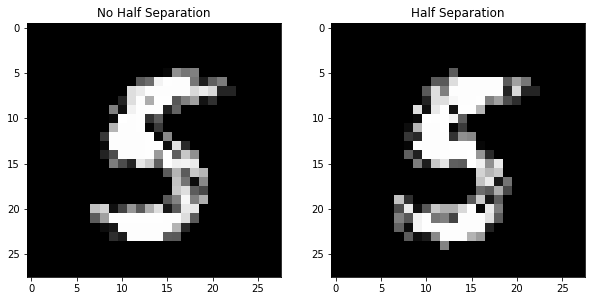

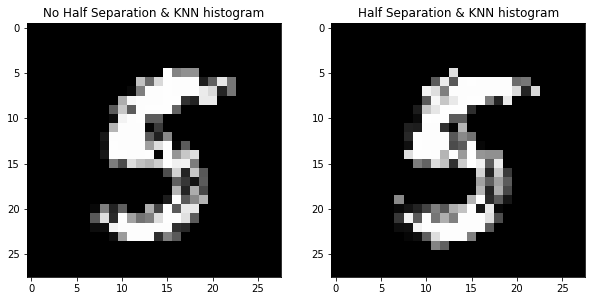

In [51]:
import random
def reconstruct_image(test_img, prob_map):
    cp_prob_map = torch.clone(prob_map)
    rec_img = torch.zeros_like(test_img, dtype=torch.uint8)
    test_img_cts = torch.bincount(test_img.flatten(), minlength=256)
    #print(test_img_cts)
    ctr = 0
    while ctr < test_img.shape[0]*test_img.shape[1]:
        val = torch.max(cp_prob_map)
        ixs = (cp_prob_map==val).nonzero()
        rand = random.randint(0,ixs.shape[0]-1)
        ix = ixs[0]
        pix_val = ix[2]
        #print(pix_val)
        #print(ix)
        if(test_img_cts[pix_val] > 0): # if we have pixel budget assign
            rec_img[ix[0],ix[1]] = pix_val #assignment
            test_img_cts[pix_val] -= 1 # reduce pixel budget
            cp_prob_map[ix[0],ix[1],:] = -1 # don't get this as max prob map
            ctr += 1
        else:   # else don't get these pixel 
            cp_prob_map[:,:,pix_val] = -1
    #print(test_img_cts)
    return rec_img

def reconstruct_from_halves(img, prob_map):
    left_rec = reconstruct_image(img[:,0:14], prob_map[:,0:14])
    right_rec = reconstruct_image(img[:,14:28], prob_map[:,14:28])
    return torch.cat((left_rec,right_rec), 1)


hist = torch.bincount(test_img.flatten(), minlength=256)
prob_map = gen_prob_map(target_lbl)
prob_map_e = gen_prob_map_exemp(target_lbl, hist,2000)
rec = reconstruct_image(test_img, prob_map)
better_rec = reconstruct_from_halves(test_img, prob_map)
rec_e = reconstruct_image(test_img, prob_map_e)
better_rec_e = reconstruct_from_halves(test_img, prob_map_e)

fig1 = plt.figure(figsize=(10,20))
fig1.add_subplot(1,2,1)
plt.imshow(rec, cmap='gray')
plt.title("No Half Separation");
fig1.add_subplot(1,2,2)
plt.imshow(better_rec, cmap='gray')
plt.title("Half Separation");
fig2 = plt.figure(figsize=(10,20))
fig2.add_subplot(1,2,1)
plt.imshow(rec_e, cmap='gray')
plt.title("No Half Separation & KNN histogram");
fig2.add_subplot(1,2,2)
plt.imshow(better_rec_e, cmap='gray')
plt.title("Half Separation & KNN histogram");


WITH WEIGHTS


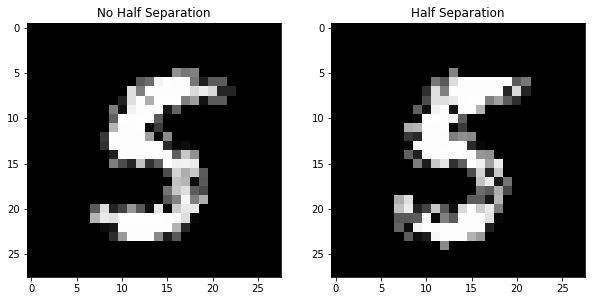

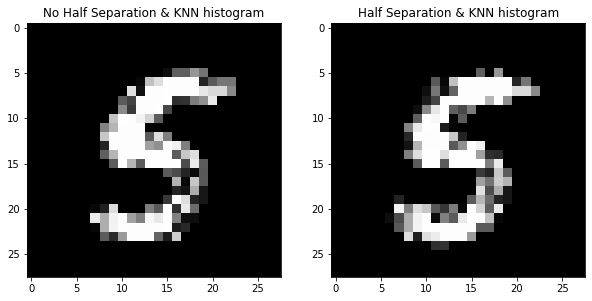

In [54]:
hist = torch.bincount(test_img.flatten(), minlength=256)
prob_map = gen_prob_map(target_lbl, hist=hist, weights=True)
prob_map_e = gen_prob_map_exemp(target_lbl, hist,1000, weights=True)
rec = reconstruct_image(test_img, prob_map)
better_rec = reconstruct_from_halves(test_img, prob_map)
rec_e = reconstruct_image(test_img, prob_map_e)
better_rec_e = reconstruct_from_halves(test_img, prob_map_e)
print('WITH WEIGHTS')
fig1 = plt.figure(figsize=(10,20))
fig1.add_subplot(1,2,1)
plt.imshow(rec, cmap='gray')
plt.title("No Half Separation");
fig1.add_subplot(1,2,2)
plt.imshow(better_rec, cmap='gray')
plt.title("Half Separation");
fig2 = plt.figure(figsize=(10,20))
fig2.add_subplot(1,2,1)
plt.imshow(rec_e, cmap='gray')
plt.title("No Half Separation & KNN histogram");
fig2.add_subplot(1,2,2)
plt.imshow(better_rec_e, cmap='gray')
plt.title("Half Separation & KNN histogram");


In [ ]:
import matplotlib.pyplot as plt
import tqdm.notebook as tq 
%matplotlib inline
targets = torch.arange(10)
l2s = torch.zeros(4,1000)
for target in targets:
    stidxs = (shuffle_train_set.targets==target).nonzero()
    prob_map = gen_prob_map(target)
    for i in tq.tqdm(range(100)):
        stidx = int(stidxs[i])
        orig_img, orig_lbl = test_set[stidx]
        shuf_img, shuf_lbl = shuffle_test_set[stidx]
        orig_img = (orig_img*255).type(torch.uint8).squeeze()
        shuf_img = (shuf_img*255).type(torch.uint8).squeeze()
        #prob_map = gen_prob_map_exemp(pr)
        rec_img = reconstruct_image(shuf_img, prob_map)
        l2s[0,i] = torch.linalg.norm((rec_img.float() - orig_img.float())/255., dim=(0,1))
        rec_img = reconstruct_from_halves(shuf_img, prob_map)
        l2s[1,i] = torch.linalg.norm((rec_img.float() - orig_img.float())/255., dim=(0,1))
        
        shuf_hist = torch.bincount(shuf_img.flatten(), minlength=256)
        prob_map =  gen_prob_map_exemp(target, shuf_hist,1000)
        rec_img = reconstruct_image(shuf_img, prob_map)
        l2s[2,i] = torch.linalg.norm((rec_img.float() - orig_img.float())/255., dim=(0,1))
        rec_img = reconstruct_image(shuf_img, prob_map)
        l2s[3,i] = torch.linalg.norm((rec_img.float() - orig_img.float())/255., dim=(0,1))



  0%|          | 0/100 [00:00<?, ?it/s]